In [1]:
import time, sys, joblib
sys.path.append('/home/yilingh/SI-Interaction')
from selectinf.Simulation.plotting_helpers import *
from selectinf.Simulation.H1.nonlinear_H1_helpers import *

# Vary SNR with Strong Hierarchy

In [3]:
dir_list = ['results0_16.pkl', 'results16_32.pkl', 'results32_48.pkl', 'results48_64.pkl']

In [13]:
opers = []
pvals = []
targets = []
for path in dir_list:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers.append(combine_lists(list_of_oper))
    pvals.append(combine_nested_lists(list_of_pval))
    targets.append(combine_lists(list_of_targets))

In [8]:
oper_char = combine_lists(opers)

In [14]:
pvals_all = combine_nested_lists(pvals)

In [16]:
targets_all = combine_lists(targets)

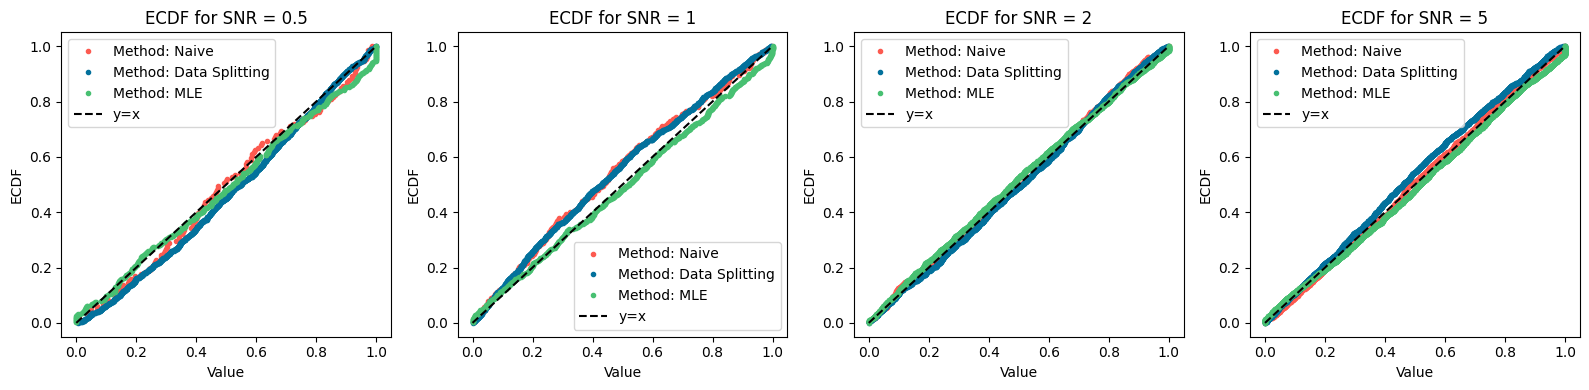

In [19]:
plot_ecdfs(pvals_all, xaxis="SNR")

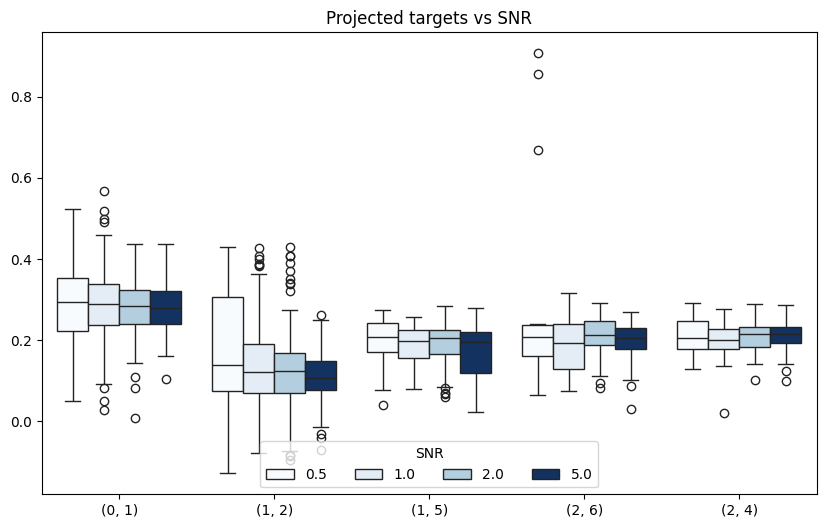

In [20]:
plot_multi_targets(targets_all, xaxis="SNR")

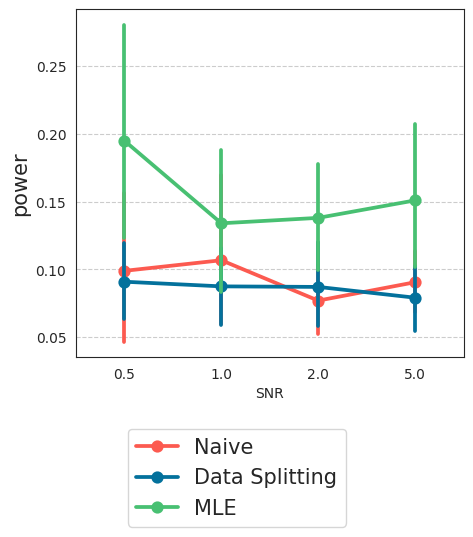

In [21]:
point_plot_multimetrics(oper_char_df=pd.DataFrame(oper_char),
                        x_axis="SNR",
                        hue="method",
                        metric_list=["power"])

# Vary SNR with Weak Hierarchy

In [2]:
dir_list_wh = ['results0_16_wh.pkl', 'results16_32_wh.pkl', 'results32_48_wh.pkl', 'results48_64_wh.pkl']

In [3]:
opers = []
pvals = []
targets = []
for path in dir_list_wh:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers.append(combine_lists(list_of_oper))
    pvals.append(combine_nested_lists(list_of_pval))
    targets.append(combine_lists(list_of_targets))

In [4]:
oper_char = combine_lists(opers)

In [5]:
pvals_all = combine_nested_lists(pvals)

In [6]:
targets_all = combine_lists(targets)

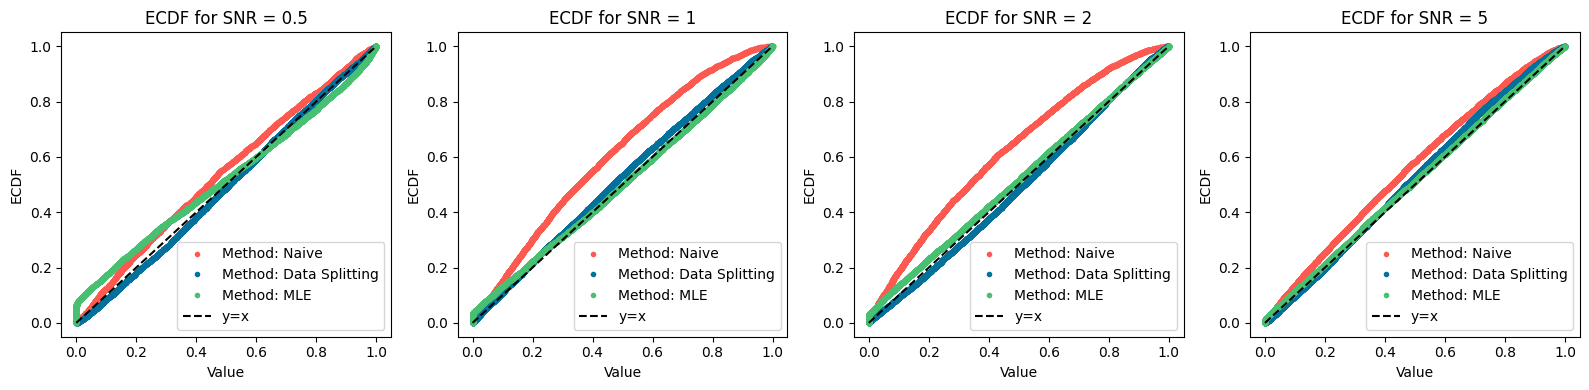

In [7]:
plot_ecdfs(pvals_all, xaxis="SNR")

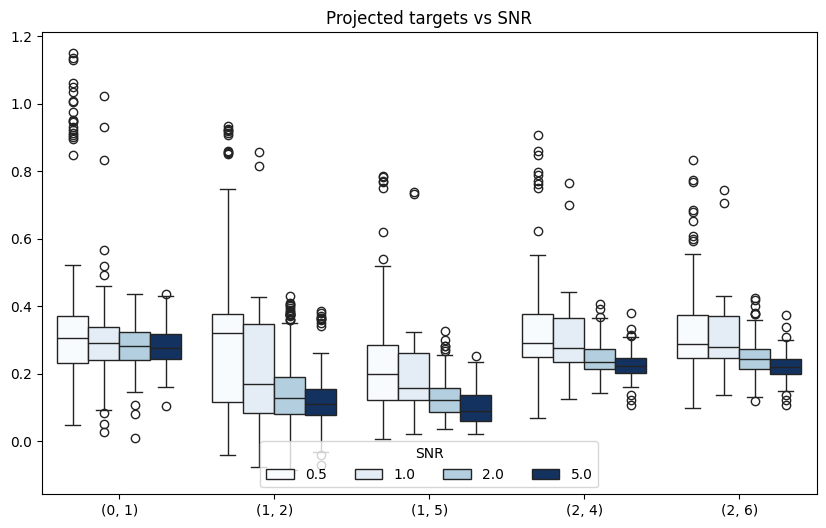

In [8]:
plot_multi_targets(targets_all, xaxis="SNR")

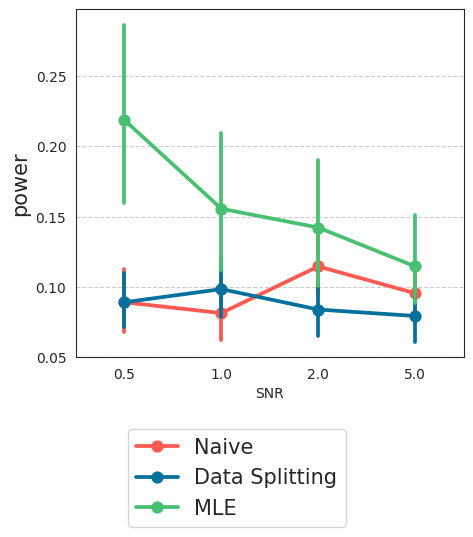

In [9]:
point_plot_multimetrics(oper_char_df=pd.DataFrame(oper_char),
                        x_axis="SNR",
                        hue="method",
                        metric_list=["power"])

In [14]:
targets_df = pd.DataFrame(targets_all)

In [17]:
targets_df

,parameter,target,target id,method
0,0.5,0.265930,"(0, 1)",Naive
1,0.5,0.401829,"(1, 2)",Naive
2,0.5,0.306903,"(1, 5)",Naive
3,0.5,0.293424,"(0, 1)",Data Splitting
4,0.5,0.377645,"(1, 2)",Data Splitting
...,...,...,...,...
3607,5.0,0.179672,"(0, 1)",MLE
3608,5.0,0.040280,"(1, 2)",MLE
3609,5.0,0.150630,"(1, 5)",MLE
3610,5.0,0.196017,"(2, 4)",MLE


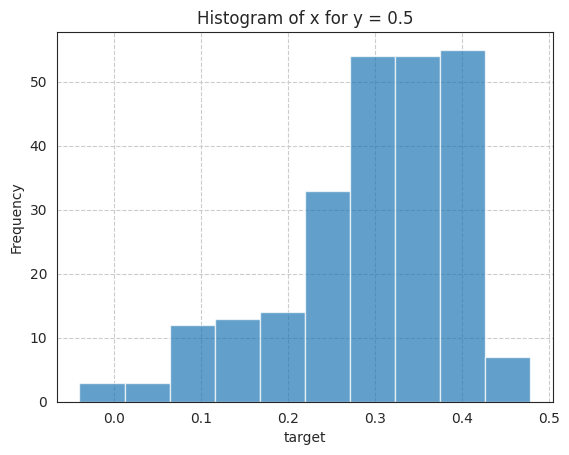

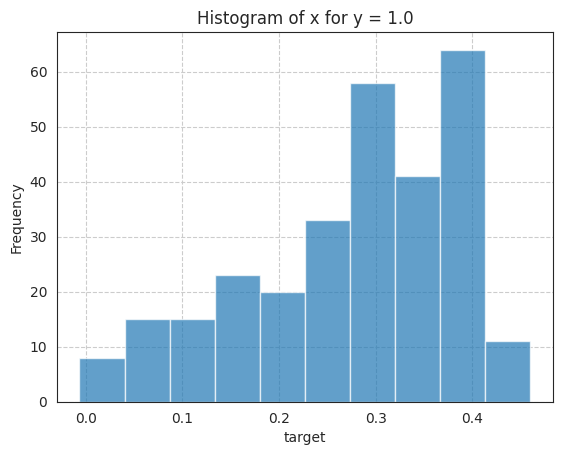

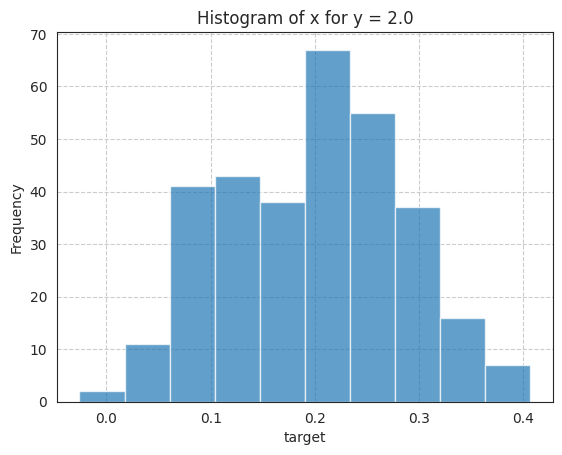

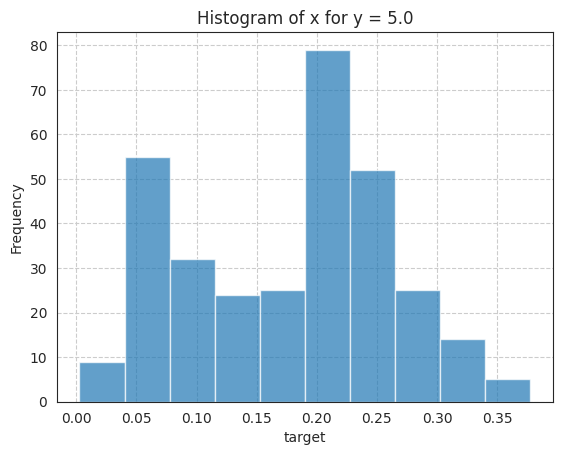

In [19]:
targets_df_naive = targets_df[targets_df['method']=='Naive']
# Grouping by 'y' and plotting histograms
grouped_targets = targets_df_naive.groupby('parameter')

for name, group in grouped_targets:
    plt.figure()
    plt.hist(group['target'], bins=10, alpha=0.7)
    plt.xlabel('target')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of x for y = {name}')
    plt.show()